In [43]:
#Importing Libraries

In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [45]:
#Extract Filenames from Folder

In [2]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [3]:
len(filenames)

44441

In [48]:
#Importing ResNet50 Model and Cofiguration

In [4]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [50]:
#Extracting Fetaures from Image

In [10]:
img = image.load_img('/Users/yogitadoshi/Desktop/Fashion_Recom_Model/images/1528.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([0.        , 0.0319598 , 0.        , ..., 0.00272932, 0.04561883,
       0.01183027], dtype=float32)

In [11]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [12]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([5.9472746e-03, 3.7714053e-02, 1.2528694e-02, ..., 6.1703147e-03,
       5.6047971e-05, 2.6491622e-02], dtype=float32)

In [13]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


[array([5.9472746e-03, 3.7714053e-02, 1.2528694e-02, ..., 6.1703147e-03,
        5.6047971e-05, 2.6491622e-02], dtype=float32),
 array([0.00243906, 0.00502102, 0.        , ..., 0.00899796, 0.010141  ,
        0.02011692], dtype=float32),
 array([0.00300274, 0.02201002, 0.00272649, ..., 0.01291527, 0.01619332,
        0.03272966], dtype=float32),
 array([0.        , 0.00604671, 0.03079083, ..., 0.00867087, 0.01381306,
        0.0020539 ], dtype=float32),
 array([0.        , 0.02514593, 0.00750099, ..., 0.01606759, 0.02194844,
        0.02754991], dtype=float32)]

In [14]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [15]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [62]:
#Loading Pickle Files

In [16]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [17]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [18]:
np.array(Image_features).shape

(5, 2048)

In [96]:
#Finidng Simialar Images

In [24]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')

In [25]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [26]:
input_image = extract_features_from_images('/Users/yogitadoshi/Desktop/Fashion_Recom_Model/images/60000.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


In [27]:
distance,indices = neighbors.kneighbors([input_image])

In [28]:
indices[0]

array([2, 4, 0, 3, 1])

In [29]:
from IPython.display import Image

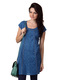

In [31]:
Image('/Users/yogitadoshi/Desktop/Fashion_Recom_Model/images/60000.jpg')

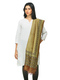

In [32]:
Image(filenames[indices[0][1]])

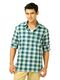

In [33]:
Image(filenames[indices[0][2]])

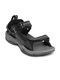

In [34]:
Image(filenames[indices[0][3]])

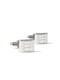

In [35]:
Image(filenames[indices[0][4]])